In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
'''
Dataset source: https://www.kaggle.com/PromptCloudHQ/us-jobs-on-monstercom/version/1
'''

'\nDataset source: https://www.kaggle.com/PromptCloudHQ/us-jobs-on-monstercom/version/1\n'

In [4]:
# List of top 20 short list from Amazon
# https://www.nytimes.com/2018/01/18/technology/cities-amazon-headquarters.html?module=inline
top_20 = [{'Atlanta': 'GA', 'Austin' :'TX', 'Boston': 'MA', 'Chicago': 'IL', 'Columbus': 'OH', 'Dallas': 'TX', 'Denver': 'CO', 'Indianapolis': 'IN', 'Los Angeles': 'CA', 'Miami': 'FL', 'Montgomery County': 'MD', 'Nashville': 'TN', 'Newark': 'NJ', 'New York': 'NY', 'Northern Virginia': 'VA', 'Philadelphia': 'PA', 'Pittsburgh': 'PA', 'Raleigh': 'NC', 'Toronto': 'Ontario', 'Washington': 'D.C.'}]



In [5]:
csvpath = 'CSV/monster_com-job_sample.csv'
df = pd.read_csv(csvpath)

In [44]:
df = df[['country','job_title','job_type','location','organization','salary','sector']]
df.head()

,country,job_title,job_type,location,organization,salary,sector
0,United States of America,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,NaN,IT/Software Development
1,United States of America,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,NaN,NaN
2,United States of America,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,NaN,NaN
3,United States of America,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,NaN,Experienced (Non-Manager)
4,United States of America,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,NaN,Project/Program Management


In [7]:
df_top_20 = df[df['location'].str.contains('|'.join(top_20))]
df_top_20.head()

,country,job_title,job_type,location,organization,salary,sector
7,United States of America,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,NaN,Experienced (Non-Manager)
8,United States of America,Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,NaN,Customer Support/Client Care
11,United States of America,Sales Associate Job in Columbus,Full Time Employee,"Columbus, IN",Business Services - Other,NaN,Customer Support/Client Care
12,United States of America,Junior Proofreader Job in Boston,Full Time,"Boston, MA",NaN,NaN,NaN
17,United States of America,Pest Control Technician – Field Service Rep (E...,"Full Time, Employee","Denver, CO",Accounting and Auditing Services,NaN,Installation/Maintenance/Repair


In [8]:
#df_top_20['location'].value_counts()[:100]
for city in top_20:
    df_top_20.loc[df_top_20['location'].str.contains(city, case=False), 'location'] = city
        

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


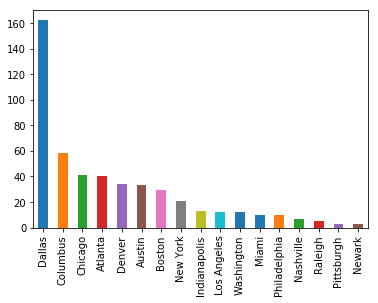

In [34]:
# Displaying all job postings per city in the top_20
# df_top_20['location'].value_counts().plot.bar()

# the data is skewed to Dallas, so here we try to take a sample of 10% 
df_top_20.sample(frac=0.1)['location'].value_counts().plot.bar()

# The sampling does not seem to change much..
plt.show()

In [10]:
# displaying all postings for 'developer' in the top_20
df_dev = df_top_20.loc[df_top_20['job_title'].str.contains('developer',case=False), 'location']

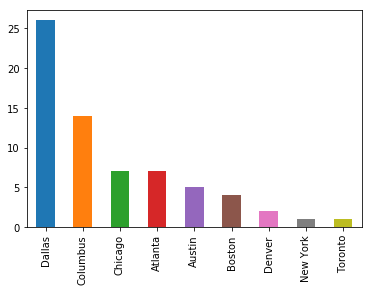

In [35]:
# here we try the sampling again, but with just developers
df_dev.sample(frac = 0.5).value_counts().plot.bar()

# A little better, but not great
plt.show()